In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer  

In [3]:
df = pd.read_csv('titanic_toy.csv')

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [6]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [7]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [9]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [10]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [11]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_age)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_age)


<ipython-input-11-8fc55a449f59>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age_median'] = X_train['Age'].fillna(median_age)
<ipython-input-11-8fc55a449f59>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age_mean'] = X_train['Age'].fillna(mean_age)
<ipython-input-11-8fc55a449f59>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [16]:
X_train.sample(15)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
564,NaN,8.0500,0,28.75,29.785904,8.0500,8.050000
78,0.83,29.0000,2,0.83,0.830000,29.0000,29.000000
271,25.00,NaN,0,25.00,25.000000,28.7500,29.785904
408,21.00,7.7750,0,21.00,21.000000,7.7750,7.775000
187,45.00,26.5500,0,45.00,45.000000,26.5500,26.550000
797,31.00,8.6833,0,31.00,31.000000,8.6833,8.683300
55,NaN,35.5000,0,28.75,29.785904,35.5000,35.500000
59,11.00,46.9000,7,11.00,11.000000,46.9000,46.900000
224,38.00,90.0000,1,38.00,38.000000,90.0000,90.000000
841,16.00,10.5000,0,16.00,16.000000,10.5000,10.500000


In [17]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  204.3495133904614
Age Variance after median imputation:  161.9895663346054
Age Variance after mean imputation:  161.81262452718673
Original Fare variable variance:  2448.197913706318
Fare Variance after median imputation:  2324.9576136149317
Fare Variance after mean imputation:  2324.623996772905


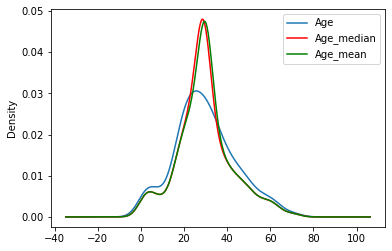

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

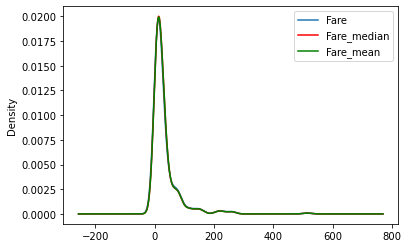

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [21]:
#Covariance

X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.280487,66.383530
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.404484,16.399278
Age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,54.710043,54.793876
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.483705,52.565299
Fare_median,66.280487,2448.197914,16.404484,54.710043,52.483705,2324.957614,2324.765012
Fare_mean,66.383530,2448.197914,16.399278,54.793876,52.565299,2324.765012,2324.623997


In [22]:
#Co-relation

X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.089604,0.089754
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205710,0.205660
Age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.089149,0.089292
Age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.085568,0.085707
Fare_median,0.089604,1.000000,0.205710,0.089149,0.085568,1.000000,0.999989
Fare_mean,0.089754,1.000000,0.205660,0.089292,0.085707,0.999989,1.000000


<AxesSubplot:>

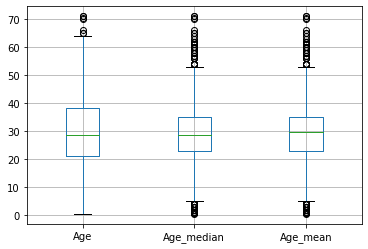

In [23]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

<AxesSubplot:>

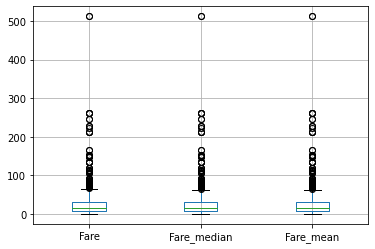

In [24]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

In [25]:
#sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [26]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [27]:
trf = ColumnTransformer([
    ('imputer2', imputer2, ['Fare']),
    ('imputer1', imputer1, ['Age'])
], remainder='passthrough')

In [28]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer2', SimpleImputer(), ['Fare']),
                                ('imputer1', SimpleImputer(strategy='median'),
                                 ['Age'])])

In [29]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [30]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [31]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [33]:
X_train, X_test

(array([[ 27.7208,  40.    ,   0.    ],
        [ 16.7   ,   4.    ,   2.    ],
        [  9.    ,  47.    ,   0.    ],
        ...,
        [ 49.5042,  71.    ,   0.    ],
        [221.7792,  28.75  ,   0.    ],
        [ 25.925 ,  28.75  ,   0.    ]]),
 array([[ 26.2875    ,  42.        ,   0.        ],
        [  8.05      ,  21.        ,   0.        ],
        [ 65.        ,  24.        ,   3.        ],
        [ 56.4958    ,  28.        ,   0.        ],
        [  7.925     ,  17.        ,   6.        ],
        [  7.8958    ,  30.        ,   0.        ],
        [ 30.        ,  80.        ,   0.        ],
        [  7.25      ,  25.        ,   0.        ],
        [133.65      ,  50.        ,   2.        ],
        [ 26.        ,  25.        ,   1.        ],
        [ 26.        ,  35.        ,   0.        ],
        [ 90.        ,  35.        ,   1.        ],
        [ 16.        ,  55.        ,   0.        ],
        [ 56.4958    ,  28.75      ,   0.        ],
        [ 56.4958